(100, 2)


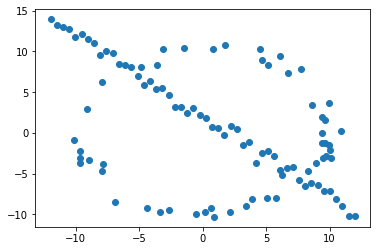

In [41]:
import numpy as np
from scipy.optimize import minimize
from scipy import linalg
import random
import matplotlib.pyplot as plt
# np . random . seed ( 0 )
N = 100

half_n = N//2
r = 10
s = r /16
t = np.random.uniform(0 , 2*np . pi , half_n)
n = s*np.random.randn (half_n)

x , y = (r+n)*np.cos(t) , (r+n)*np.sin(t)
X_circ = np.hstack ((x.reshape(half_n , 1) , y.reshape(half_n , 1)))

m, b = -1, 2
x = np.linspace (-12, 12 , half_n )
y = m*x + b + s*np.random.randn(half_n)
X_line = np . hstack (( x.reshape (half_n , 1) , y.reshape(half_n , 1)))

X = np.vstack((X_circ , X_line))
print(np.shape(X))

plt.figure(1)
# plt.scatter(X_circ[:,0],X_circ[:,1])
# plt.scatter(X_line[:,0],X_line[:,1])
plt.scatter(X[:,0],X[:,1])

x_data = X[:,0]
y_data = X[:,1]
n = np.shape(X)[0]

def random_sample(list):
    sample_list = []


		# while True:
		# 	ran = np.random.randint(n)

		# 	if ran not in rand_nums:
		# 		sample.append((list[ran][0], list[ran][1]))
		# 		rand_nums.append(ran)
			

		# 		if len(sample) == 3:
		# 			break

		#return sample
    rand_nums = random.sample(range(1, 100), 3)
    for i in rand_nums:
        sample_list.append((list[i][0], list[i][1]))
    return sample_list

def model(sample):
		# calculate A, B, C value from three points by using matrix
	
		pt1 = sample[0]
		pt2 = sample[1]
		pt3 = sample[2]

		A = np.array([[pt2[0] - pt1[0], pt2[1] - pt1[1]], [pt3[0] - pt2[0], pt3[1] - pt2[1]]]) 
		B = np.array([[pt2[0]**2 - pt1[0]**2 + pt2[1]**2 - pt1[1]**2], [pt3[0]**2 - pt2[0]**2 + pt3[1]**2 - pt2[1]**2]])		
		inv_A = np.pinv(A)

		c_x, c_y = np.dot(inv_A, B) / 2
		c_x, c_y = c_x[0], c_y[0]
		r = np.sqrt((c_x - pt1[0])**2 + (c_y - pt1[1])**2)

		return c_x, c_y, r

def inliers(x_data, y_data, c_x, c_y, r):
    inliers = []
    d = r//2

    for i in range(len(x_data)):
        dis = np.sqrt((x_data[i]-c_x)**2 + (y_data[i]-c_y)**2)
        if dis < d:
            inliers.append(i)
        
        return inliers

max_inliers = []
sample_list = 
  
        